# Transplant
### Features of categorical variables 

This notebook is trying to make more sense in categorical variables.

In [14]:
#!pip install pandas-profiling
import pandas_profiling

In [57]:
#data cleanning
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
import datetime
import sys
pd.set_option('display.max_columns', None)

In [58]:
#decsion trees
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from ipywidgets import Image
from io import StringIO
import pydotplus #conda install pydotplus
from sklearn.tree import export_graphviz

### import data

In [59]:
base = pd.read_excel('base LgTx IA 24oct2018.xlsx', sheetname='ensemble')
base.head(2)

,numero,date_transplantation,heure_arrivee_bloc,pathologie,age,sexe,Poids,Taille,other_organ_transplantation,super_urgence,retransplant,transplanted_twice_during_study_period,time_on_waiting_liste,LAS,preoperative_ICU,preoperative_vasopressor,preoperative_mechanical_ventilation,ATCD_medicaux,PFO,body_mass_index,diabetes,preoperative_pulmonary_hypertension,PAPS,Insuffisance_renale,CMV_receveur,plasmapherese,preoperative_ECMO,ATCD_chirugicaux,thoracic_surgery_history,CMV_donneur,EBV_donneur,Age_donor,Sex_donor,BMI_donor,Poids_donor,Taille_donor,Donneur_CPT,Tabagisme_donor,Aspirations_donor,RX_donor,PF_donor,oto_score,exvivo,Immunosuppresseurs,heure_transfert_rea,date_sortie_bloc,duree_sejour_bloc,Antibioprophylaxie,PB_induction,Pb_induction_detail,FIO2_initiale,pH_initial,PAPS_initiale,PA_initiale,VT_initial,PaCO2_initial,PAPM_initiale,Fc_initiale,FR_initial,PaO2_initial,PAPD_initiale,NORAD_initiale,PEEP_initial,Bicarbonates_initial,NO_initiale,Lactate_initial,SvO2_initiale,Ic_initial,Hb_initial,Qc_initiale,Examen_Echographique_initial,Problemes_VBP,Problemes_VBP_commentaires,premiere_transplantation_cote,Ventilation_Unipulmonaire_Pb,FiO2_clampage_cote_1,PH_clampage_cote_1,PAPS_clampage_cote_1,PA_clampage_cote_1,VT_clampage_cote_1,PaCO2_clampage_cote_1,PAPM_clampage_cote_1,FC_clampage_cote_1,Fr_clampage_cote_1,PaO2_clampage_cote_1,PAPD_clampage_cote_1,NORAD_clampage_cote_1,PEEP_clampage_cote_1,Bicarbonates_clampage_cote_1,NO_clampage_cote_1,Evolution_PAP_clampage_cote_1,Lactates_clampage_cote_1,SvO2_clampage_cote_1,Ic_clampage_cote_1,Hb_clampage_cote_1,Qc_clampage_cote_1,Examen_Echographique_clampage_cote_1,evenements_clampage_cote_1,evenements_clampage_cote_1_commentaires,Heure_declampage_cote1,first_lung_ischemic_time,FiO2_declampage_cote1,PH_declampage_cote_1,PAPS_declampage_cote_1,PA _declampage_cote_1,VT_declampage_cote_1,PaCO2_declampage_cote_1,PAPM_declampage_cote_1,FC_declampage_cote_1,Fr_declampage_cote_1,PaO2_declampage_cote_1,PAPD_declampage_cote_1,NORAD_declampage_cote_1,PEEP_declampage_cote_1,Bicarbonates_declampage_cote_1,NO_declampage_cote_1,Evolution_PAP_declampage_cote_1,SvO2_declampage_cote_1,Lactates_declampage_cote_1,Ic_declampage_cote_1,Hb_declampage_cote_1,Qc_declampage_cote_1,Examen_Echographique_declampage_cote_1,evenements_declampage_cote_1,evenements_declampage_cote_1_commentaires,Saigement_estime_declampage_cote1,classification_bullage_1,duree_bullage_1,retentissement_ETO_bullage_1,retentissement_ECG_bullage_1,retentissement_BIS_bullage_1,Retentissement_hemodynamique_bullage_1,deuxieme_transplantation_cote,Ventilation_Unipulmonaire_Pb.1,FiO2_clampage_cote_2,PH_clampage_cote_2,PAPS_clampage_cote_2,PA_clampage_cote_2,VT_clampage_cote_2,PaCO2_clampage_cote_2,PAPM_clampage_cote_2,FC_clampage_cote_2,Fr_clampage_cote_2,PaO2_clampage_cote_2,PAPD_clampage_cote_2,NORAD_clampage_cote_2,PEEP_clampage_cote_2,Bicarbonates_clampage_cote_2,NO_clampage_cote_2,Evolution_PAP_clampage_cote_2,Lactates_clampage_cote_2,SvO2_clampage_cote_2,Ic_clampage_cote_2,Hb_clampage_cote_2,Qc_clampage_cote_2,Examen_Echographique_clampage_cote_2,evenements_clampage_cote_2,evenements_clampage_cote_2_commentaires,Heure_declampage_cote2,second_lung_ischemic_time,FiO2_declampage_cote2,PH_declampage_cote_2,PAPS_declampage_cote_2,PA _declampage_cote_2,VT_declampage_cote_2,PaCO2_declampage_cote_2,PAPM_declampage_cote_2,FC_declampage_cote_2,Fr_declampage_cote_2,PaO2_declampage_cote_2,PAPD_declampage_cote_2,NORAD_declampage_cote_2,PEEP_declampage_cote_2,Bicarbonates_declampage_cote_2,NO_declampage_cote_2,Evolution_PAP_declampage_cote_2,SvO2_declampage_cote_2,Lactates_declampage_cote_2,Ic_declampage_cote_2,Hb_declampage_cote_2,Qc_declampage_cote_2,Examen_Echographique_declampage_cote_2,evenements_declampage_cote_2,evenements_declampage_cote_2_commentaires,Saigement_estime_declampage_cote2,classification_bullage_2,duree_bullage_2,retentissement_ETO_bullage_2,retentissement_ECG_bullage_2,retentissement_BIS_bullage_2,Retentissement_hemodynamique_bull

In [60]:
text=pd.read_excel('texte libre ETO et evolutions.xlsx', sheetname='Feuil1')
text.head(2)

,numero,echo_initial_traduit,echo_clampage_1_traduit,evenement_clampage_1_traduit,echo_declampage_1_traduit,evenement_declampage_1_traduit,echo_clampage_2_traduit,evenement_clampage_2_traduit
0,1,examen initial normal,bonne tolérance hémodynamique au clampage sous...,NaN,RAS,RAS,NaN,ECMO
1,2,trouble de la relaxation VG,raidissement du septum interventriculaire,NaN,RAS,NaN,NaN,


### create the dummy varibales for text

In [61]:
def change_dummy(varibale,basetable,pre_fix):
    dummies = pd.get_dummies(varibale, drop_first=True,prefix=pre_fix)
    basetable = pd.concat([basetable, dummies], axis=1)
    del varibale
    return basetable
    

In [66]:
?pd.get_dummies

In [11]:
text.columns

Index(['numero', 'echo_initial_traduit', 'echo_clampage_1_traduit',
       'evenement_clampage_1_traduit', 'echo_declampage_1_traduit',
       'evenement_declampage_1_traduit', 'echo_clampage_2_traduit',
       'evenement_clampage_2_traduit'],
      dtype='object')

In [63]:
text_try=text

In [64]:
text_try=change_dummy(text_try['echo_initial_traduit'],text_try,'echo_initial')
text_try=change_dummy(text_try['echo_clampage_1_traduit'],text_try,'echo_clampage_1')
text_try=change_dummy(text_try['evenement_clampage_1_traduit'],text_try,'evenement_clampage_1')
text_try=change_dummy(text_try['echo_declampage_1_traduit'],text_try,'echo_declampage_1')
text_try=change_dummy(text_try['evenement_declampage_1_traduit'],text_try,'evenement_declampage_1')
text_try=change_dummy(text_try['echo_clampage_2_traduit'],text_try,'echo_clampage_2')
text_try=change_dummy(text_try['evenement_clampage_2_traduit'],text_try,'evenement_clampage_2')

In [65]:
del text_try['echo_initial_traduit']
del text_try['echo_clampage_1_traduit']
del text_try['evenement_clampage_1_traduit']
del text_try['echo_declampage_1_traduit']
del text_try['evenement_declampage_1_traduit']
del text_try['echo_clampage_2_traduit']
del text_try['evenement_clampage_2_traduit']
text_try.head(2)

,numero,echo_initial_PFO,echo_initial_VD dilate septum raide,echo_initial_VD dilaté,echo_initial_VD dilaté dyskinesie,echo_initial_VD dilaté sous ECMO,echo_initial_VD=VG,echo_initial_VD=VG FOP,echo_initial_VD=VG septum paradoxal,echo_initial_VD=VG septum raide,echo_initial_VD=VG septum raide PFO sous ECMO,echo_initial_VD=VG septum raide dyskinesie,echo_initial_dyskinesie,echo_initial_examen initial normal,echo_initial_septum raide,echo_initial_septum raide turgescence hepatique,echo_initial_sous ECMO,echo_initial_sous ECMO VD dilate,echo_clampage_1_bonne tolérance hémodynamique au clampage,echo_clampage_1_bonne tolérance hémodynamique au clampage hypovolemie,echo_clampage_1_bonne tolérance hémodynamique au clampage sous ECMO,"echo_clampage_1_bonne tolérance hémodynamique au clampage, hypovolemie",echo_clampage_1_dilatation VD septum paradoxal,echo_clampage_1_discrète dilatation VD,echo_clampage_1_discrète dilatation VD septum paradoxal,echo_clampage_1_discrète dilatation VD sous ECMO,echo_clampage_1_dyskinesie,echo_clampage_1_dyskinesie hypovolemie,echo_clampage_1_examen normal,echo_clampage_1_hypovolemie,echo_clampage_1_ininterpretable,echo_clampage_1_raidissement du septum interventriculaire,echo_clampage_1_raidissement du septum interventriculaire sous ECMO,"echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD, sous ECMO","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD,hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, dyskinesie","echo_clampage_1_raidissement du septum interventriculaire, hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, sous ECMO",echo_clampage_1_septum paradoxal,echo_clampage_1_sous ECMO,echo_clampage_1_sous ECMO dyskinesie,echo_clampage_1_sous ECMO hypovolemie,echo_clampage_1_sous ECMO septum paradoxal,evenement_clampage_1_ACFA,evenement_clampage_1_Dissection hémorragique,evenement_clampage_1_TV necessitant TTT,"evenement_clampage_1_asystolie, Dissection hémorragique",evenement_clampage_1_bradycardie,echo_declampage_1_asystolie,echo_declampage_1_dysfonction droite,echo_declampage_1_dyskinesie,echo_declampage_1_hypokinesie,echo_declampage_1_hypovolemie,evenement_declampage_1_dysfonction droite,evenement_declampage_1_hemorragie hypovolemie,evenement_declampage_1_hemorragie hypovolemie asystolie,evenement_declampage_1_hemorragie hypovolemie hypokinesie,evenement_declampage_1_hemorragie hypovolemie oedeme,evenement_declampage_1_hypovolemie,evenement_declampage_1_oedeme de reperfusion,evenement_declampage_1_reprise d'anastomose,evenement_declampage_1_retentissement coronaire,evenement_declampage_1_retentissement coronaire asystolie,evenement_declampage_1_retentissement coronaire dyskinesie,evenement_declampage_1_retentissement coronaire hemorragie hypovolemie,evenement_declampage_1_retentissement coronaire retentissement sur le BIS,evenement_declampage_1_retentissement coronaire retentissement sur le BIS dyskinesie,evenement_declampage_1_retentissement coronaire retentissement sur le BIS hemorragie hypovolemie,evenement_declampage_1_retentissement sur le BIS,evenement_declampage_1_retentissement sur le BIS asystolie,evenement_declampage_1_shunt intracardiaque,evenement_declampage_1_sous ST minime,"echo_clampage_2_raidissement du septum interventriculaire, dyskinesie",evenement_clampage_2_ACFA asystolie,evenement_clampage_2_ACFA mal toleree,evenement_clampage_2_Arlequin,evenement_clampage_2_CPA,evenement_clampage_2_CPA Asystolie,evenement_clampage_2_CPA ECMO,evenement_clampage_2_CPA asystolie ECMO,evenement_clampage_2_CPA oedeme pulmonaire ECMO,evenement_clampage_2_Dissection hémorragique,evenement_clampage_2_Dissection hémorragique CPA oedeme pulmonaire ECMO,"evenement_clampage_2_Dissection hémorragique, CPA, oedeme pulmonai

### create the target

In [15]:
#drop numero NA
base=base.dropna(subset=["date_transplantation"])
#base=base.dropna(subset=["ACFA"])


In [16]:
#drop the survial_days equal=xxx
base=base[base["numero"] != 405]
data=base

In [86]:
data.columns

Index(['numero', 'date_transplantation', 'heure_arrivee_bloc', 'pathologie',
       'age', 'sexe', 'Poids', 'Taille', 'other_organ_transplantation',
       'super_urgence',
       ...
       'P_F_H0', 'PGD_H0', 'P_F_end_surgery', 'PGD_end_surgery',
       'time_last_PF', 'PDG_h24', 'PGD_h48', 'PGD3', 'date_de_deces',
       'Survival_days_27_10_2018'],
      dtype='object', length=285)

In [66]:
failure = (data[" immediate_extubation"] == 1) & (data["secondary_intubation"] == 1)
failure2 = (data[" immediate_extubation"] == 0) & (data["secondary_intubation"] == 0) & (data["Survival_days_27_10_2018"]>=2)
failure3 = (data[" immediate_extubation"] == 0) & (data["secondary_intubation"] == 1)

In [67]:

success = (data[" immediate_extubation"] == 1) & (data["secondary_intubation"] == 0)
success2 = (data[" immediate_extubation"] == 0) & (data["secondary_intubation"] == 0) & (data["Survival_days_27_10_2018"]<=2)


In [68]:
data["target"]  = np.nan

data["target"][failure] = 0
data["target"][failure2] = 0
data["target"][failure3] = 0
data["target"][success] = 1
data["target"][success2] = 1


data[data.target.notnull()][['target', ' immediate_extubation', "secondary_intubation"]].head()


,target,immediate_extubation,secondary_intubation
0,0.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [69]:
## Quick cleaning : replace NF by nan value
data = data.replace("NF", np.nan)
#verifier les NAs
#print(data.isna().sum())

In [70]:
data = data[data.target.notnull()]
data.shape

(408, 286)

In [71]:
data_s=data[data.target.notnull()][["numero","target"]]

In [74]:
text_f=pd.merge(text_try,data_s,on='numero',how='left')

In [75]:
text_f.head()


,numero,echo_initial_PFO,echo_initial_VD dilate septum raide,echo_initial_VD dilaté,echo_initial_VD dilaté dyskinesie,echo_initial_VD dilaté sous ECMO,echo_initial_VD=VG,echo_initial_VD=VG FOP,echo_initial_VD=VG septum paradoxal,echo_initial_VD=VG septum raide,echo_initial_VD=VG septum raide PFO sous ECMO,echo_initial_VD=VG septum raide dyskinesie,echo_initial_dyskinesie,echo_initial_examen initial normal,echo_initial_septum raide,echo_initial_septum raide turgescence hepatique,echo_initial_sous ECMO,echo_initial_sous ECMO VD dilate,echo_clampage_1_bonne tolérance hémodynamique au clampage,echo_clampage_1_bonne tolérance hémodynamique au clampage hypovolemie,echo_clampage_1_bonne tolérance hémodynamique au clampage sous ECMO,"echo_clampage_1_bonne tolérance hémodynamique au clampage, hypovolemie",echo_clampage_1_dilatation VD septum paradoxal,echo_clampage_1_discrète dilatation VD,echo_clampage_1_discrète dilatation VD septum paradoxal,echo_clampage_1_discrète dilatation VD sous ECMO,echo_clampage_1_dyskinesie,echo_clampage_1_dyskinesie hypovolemie,echo_clampage_1_examen normal,echo_clampage_1_hypovolemie,echo_clampage_1_ininterpretable,echo_clampage_1_raidissement du septum interventriculaire,echo_clampage_1_raidissement du septum interventriculaire sous ECMO,"echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD, sous ECMO","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD,hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, dyskinesie","echo_clampage_1_raidissement du septum interventriculaire, hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, sous ECMO",echo_clampage_1_septum paradoxal,echo_clampage_1_sous ECMO,echo_clampage_1_sous ECMO dyskinesie,echo_clampage_1_sous ECMO hypovolemie,echo_clampage_1_sous ECMO septum paradoxal,evenement_clampage_1_ACFA,evenement_clampage_1_Dissection hémorragique,evenement_clampage_1_TV necessitant TTT,"evenement_clampage_1_asystolie, Dissection hémorragique",evenement_clampage_1_bradycardie,echo_declampage_1_asystolie,echo_declampage_1_dysfonction droite,echo_declampage_1_dyskinesie,echo_declampage_1_hypokinesie,echo_declampage_1_hypovolemie,evenement_declampage_1_dysfonction droite,evenement_declampage_1_hemorragie hypovolemie,evenement_declampage_1_hemorragie hypovolemie asystolie,evenement_declampage_1_hemorragie hypovolemie hypokinesie,evenement_declampage_1_hemorragie hypovolemie oedeme,evenement_declampage_1_hypovolemie,evenement_declampage_1_oedeme de reperfusion,evenement_declampage_1_reprise d'anastomose,evenement_declampage_1_retentissement coronaire,evenement_declampage_1_retentissement coronaire asystolie,evenement_declampage_1_retentissement coronaire dyskinesie,evenement_declampage_1_retentissement coronaire hemorragie hypovolemie,evenement_declampage_1_retentissement coronaire retentissement sur le BIS,evenement_declampage_1_retentissement coronaire retentissement sur le BIS dyskinesie,evenement_declampage_1_retentissement coronaire retentissement sur le BIS hemorragie hypovolemie,evenement_declampage_1_retentissement sur le BIS,evenement_declampage_1_retentissement sur le BIS asystolie,evenement_declampage_1_shunt intracardiaque,evenement_declampage_1_sous ST minime,"echo_clampage_2_raidissement du septum interventriculaire, dyskinesie",evenement_clampage_2_ACFA asystolie,evenement_clampage_2_ACFA mal toleree,evenement_clampage_2_Arlequin,evenement_clampage_2_CPA,evenement_clampage_2_CPA Asystolie,evenement_clampage_2_CPA ECMO,evenement_clampage_2_CPA asystolie ECMO,evenement_clampage_2_CPA oedeme pulmonaire ECMO,evenement_clampage_2_Dissection hémorragique,evenement_clampage_2_Dissection hémorragique CPA oedeme pulmonaire ECMO,"evenement_clampage_2_Dissection hémorragique, CPA, oedeme pulmonai

In [82]:
text_f=text_f.drop(['numero'], axis=1)

In [91]:
text_f=text_f[text_f.target.notnull()]

In [93]:
text_f.shape

(408, 103)

In [104]:
text_f.to_csv('./text_f.csv',index=False)

In [94]:
text_s=text_f

In [95]:
text_s=text_s.drop(['target'], axis=1)
text_s.columns

Index(['echo_initial_PFO', 'echo_initial_VD dilate septum raide',
       'echo_initial_VD dilaté', 'echo_initial_VD dilaté dyskinesie',
       'echo_initial_VD dilaté sous ECMO', 'echo_initial_VD=VG',
       'echo_initial_VD=VG FOP', 'echo_initial_VD=VG septum paradoxal',
       'echo_initial_VD=VG septum raide',
       'echo_initial_VD=VG septum raide PFO sous ECMO',
       ...
       'evenement_clampage_2_dyskinésie', 'evenement_clampage_2_hypovolemie',
       'evenement_clampage_2_hypovolemie asystolie',
       'evenement_clampage_2_hypovolemie oedeme pulmonaire',
       'evenement_clampage_2_hypovolemie, dilatation pulmonaire',
       'evenement_clampage_2_oedeme pulmonaire',
       'evenement_clampage_2_oedeme pulmonaire ECMO',
       'evenement_clampage_2_oedeme pulmonaire ECMO hypovolemie',
       'evenement_clampage_2_retentissement BIS',
       'evenement_clampage_2_retentissement BIS ECMO'],
      dtype='object', length=102)

In [96]:
text_s.head()

,echo_initial_PFO,echo_initial_VD dilate septum raide,echo_initial_VD dilaté,echo_initial_VD dilaté dyskinesie,echo_initial_VD dilaté sous ECMO,echo_initial_VD=VG,echo_initial_VD=VG FOP,echo_initial_VD=VG septum paradoxal,echo_initial_VD=VG septum raide,echo_initial_VD=VG septum raide PFO sous ECMO,echo_initial_VD=VG septum raide dyskinesie,echo_initial_dyskinesie,echo_initial_examen initial normal,echo_initial_septum raide,echo_initial_septum raide turgescence hepatique,echo_initial_sous ECMO,echo_initial_sous ECMO VD dilate,echo_clampage_1_bonne tolérance hémodynamique au clampage,echo_clampage_1_bonne tolérance hémodynamique au clampage hypovolemie,echo_clampage_1_bonne tolérance hémodynamique au clampage sous ECMO,"echo_clampage_1_bonne tolérance hémodynamique au clampage, hypovolemie",echo_clampage_1_dilatation VD septum paradoxal,echo_clampage_1_discrète dilatation VD,echo_clampage_1_discrète dilatation VD septum paradoxal,echo_clampage_1_discrète dilatation VD sous ECMO,echo_clampage_1_dyskinesie,echo_clampage_1_dyskinesie hypovolemie,echo_clampage_1_examen normal,echo_clampage_1_hypovolemie,echo_clampage_1_ininterpretable,echo_clampage_1_raidissement du septum interventriculaire,echo_clampage_1_raidissement du septum interventriculaire sous ECMO,"echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD, sous ECMO","echo_clampage_1_raidissement du septum interventriculaire, discrète dilatation VD,hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, dyskinesie","echo_clampage_1_raidissement du septum interventriculaire, hypovolemie","echo_clampage_1_raidissement du septum interventriculaire, sous ECMO",echo_clampage_1_septum paradoxal,echo_clampage_1_sous ECMO,echo_clampage_1_sous ECMO dyskinesie,echo_clampage_1_sous ECMO hypovolemie,echo_clampage_1_sous ECMO septum paradoxal,evenement_clampage_1_ACFA,evenement_clampage_1_Dissection hémorragique,evenement_clampage_1_TV necessitant TTT,"evenement_clampage_1_asystolie, Dissection hémorragique",evenement_clampage_1_bradycardie,echo_declampage_1_asystolie,echo_declampage_1_dysfonction droite,echo_declampage_1_dyskinesie,echo_declampage_1_hypokinesie,echo_declampage_1_hypovolemie,evenement_declampage_1_dysfonction droite,evenement_declampage_1_hemorragie hypovolemie,evenement_declampage_1_hemorragie hypovolemie asystolie,evenement_declampage_1_hemorragie hypovolemie hypokinesie,evenement_declampage_1_hemorragie hypovolemie oedeme,evenement_declampage_1_hypovolemie,evenement_declampage_1_oedeme de reperfusion,evenement_declampage_1_reprise d'anastomose,evenement_declampage_1_retentissement coronaire,evenement_declampage_1_retentissement coronaire asystolie,evenement_declampage_1_retentissement coronaire dyskinesie,evenement_declampage_1_retentissement coronaire hemorragie hypovolemie,evenement_declampage_1_retentissement coronaire retentissement sur le BIS,evenement_declampage_1_retentissement coronaire retentissement sur le BIS dyskinesie,evenement_declampage_1_retentissement coronaire retentissement sur le BIS hemorragie hypovolemie,evenement_declampage_1_retentissement sur le BIS,evenement_declampage_1_retentissement sur le BIS asystolie,evenement_declampage_1_shunt intracardiaque,evenement_declampage_1_sous ST minime,"echo_clampage_2_raidissement du septum interventriculaire, dyskinesie",evenement_clampage_2_ACFA asystolie,evenement_clampage_2_ACFA mal toleree,evenement_clampage_2_Arlequin,evenement_clampage_2_CPA,evenement_clampage_2_CPA Asystolie,evenement_clampage_2_CPA ECMO,evenement_clampage_2_CPA asystolie ECMO,evenement_clampage_2_CPA oedeme pulmonaire ECMO,evenement_clampage_2_Dissection hémorragique,evenement_clampage_2_Dissection hémorragique CPA oedeme pulmonaire ECMO,"evenement_clampage_2_Dissection hémorragique, CPA, oedeme pulmonaire",eve

### P-value

In [76]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [97]:
X=text_s


In [100]:
y = text_f.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()




In [101]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                    0.7230
Date:                Tue, 11 Dec 2018   Prob (F-statistic):              0.972
Time:                        22:02:28   Log-Likelihood:                -217.98
No. Observations:                 408   AIC:                             638.0
Df Residuals:                     307   BIC:                             1043.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------


#### Visusalization

C:\Users\feife\Anaconda3\lib\site-packages\pandas\plotting\_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


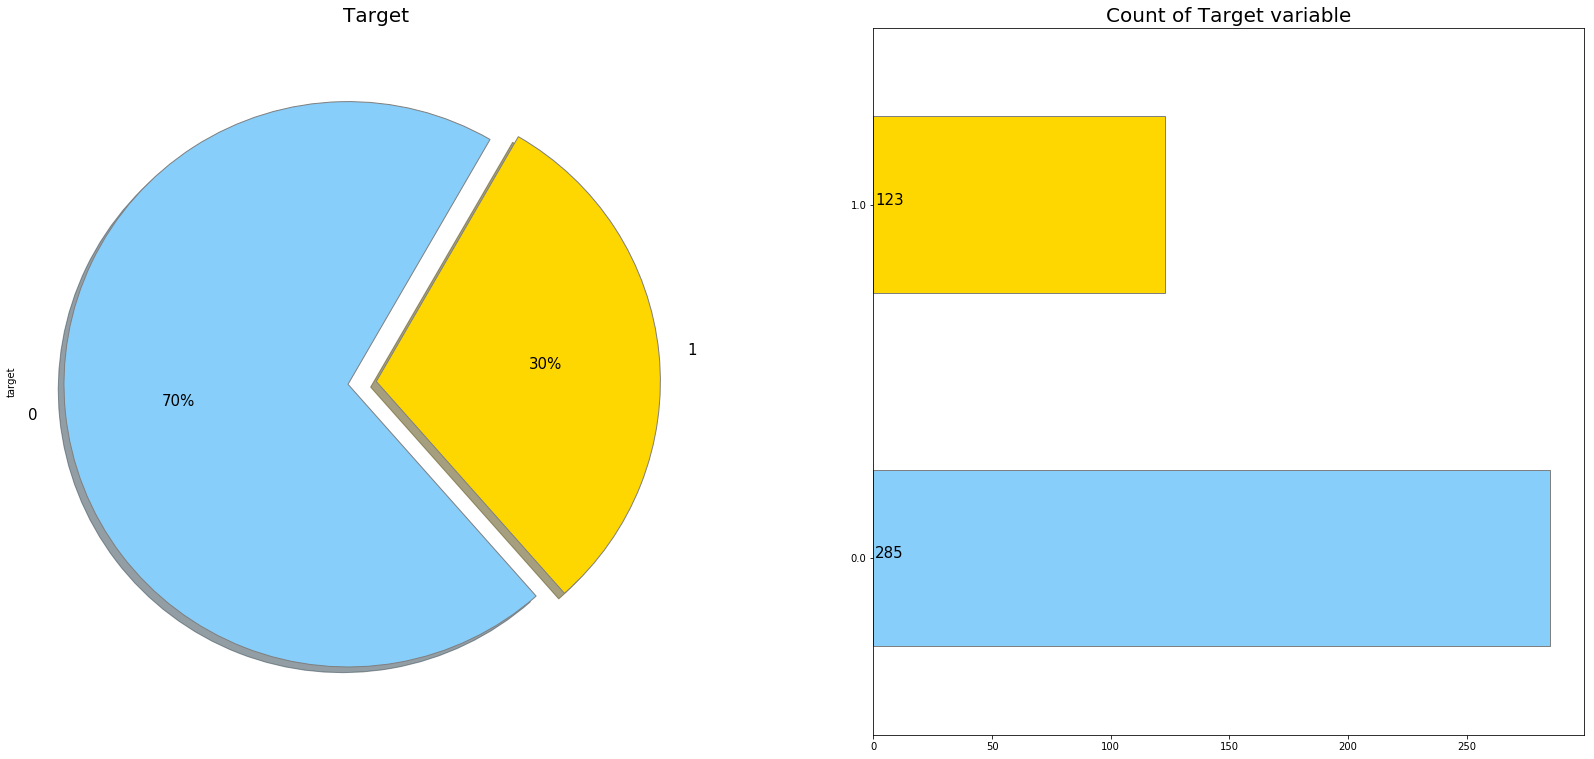

In [31]:
plt.figure(figsize=(28,13))
plt.subplot(121)
data['target'].value_counts().plot.pie(autopct = "%1.0f%%",
                                          textprops = { 'fontsize': 15}, colors = ['lightskyblue', 'gold'],
                                          startangle = 60,labels = ["0","1"],
                                          wedgeprops={"linewidth":1,"edgecolor":"grey"},
                                          explode=[.1,0],shadow =True)
plt.title("Target", fontsize = 20)
plt.subplot(122)
ax = data['target'].value_counts().plot(kind="barh", alpha = 1, colors = ['lightskyblue', 'gold'],  edgecolor='grey', linewidth =1)
for i,j in enumerate(data['target'].value_counts().values):
    ax.text(.7,i,j,fontsize = 15)
plt.title("Count of Target variable", fontsize = 20)
plt.show()

In [102]:
# Def plot distribution
def plot_distribution(data,data_select) : 
    sns.set_style("ticks")
    s = sns.FacetGrid(data, hue = 'target',aspect = 2.5, palette ={0 : 'lightskyblue', 1 :'gold'})
    s.map(sns.kdeplot, data_select, shade = True, alpha = 0.5)
    s.set(xlim=(0, data[data_select].max()))
    s.add_legend()
    s.set_axis_labels(data_select, 'proportion')
    s.fig.suptitle(data_select)
    plt.show()

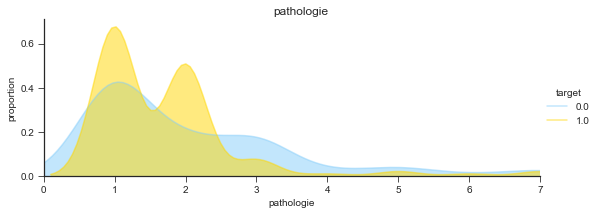

In [103]:
plot_distribution(data,'pathologie')

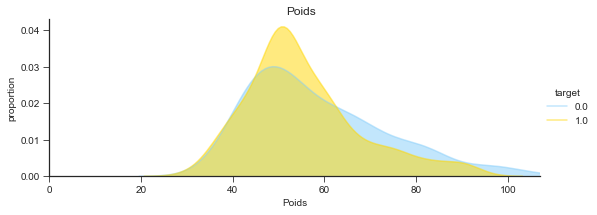

In [37]:
plot_distribution(data,'Poids')

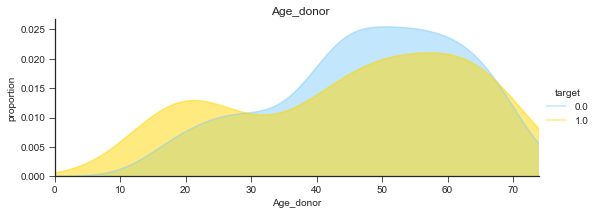

In [38]:
plot_distribution(data,'Age_donor')

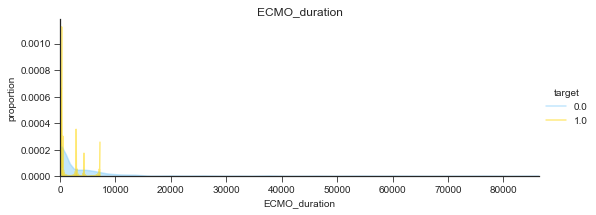

In [39]:
plot_distribution(data,'ECMO_duration')

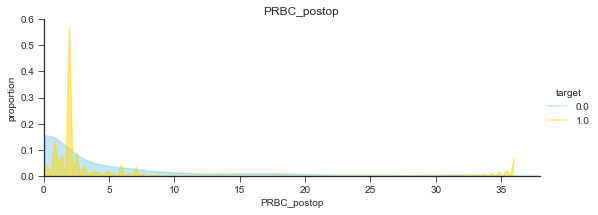

In [41]:
plot_distribution(data,'PRBC_postop')

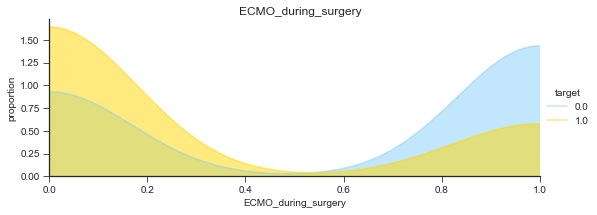

In [52]:
plot_distribution(data,'ECMO_during_surgery')

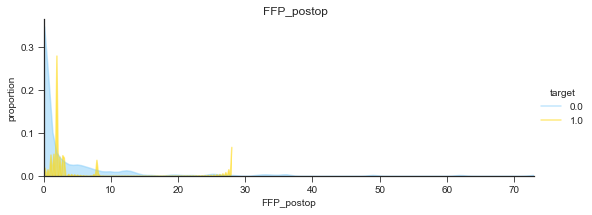

In [42]:
plot_distribution(text_f,'FFP_postop')

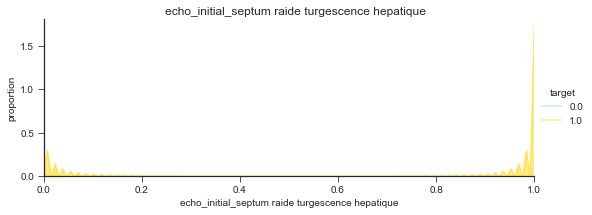

In [112]:
plot_distribution(text_f,'echo_initial_septum raide turgescence hepatique')

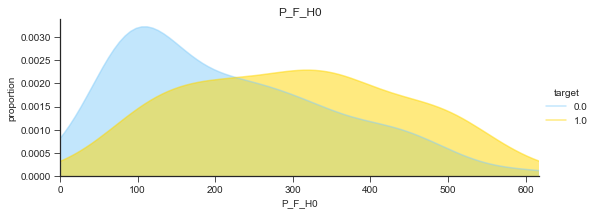

In [55]:
plot_distribution(data,'P_F_H0')

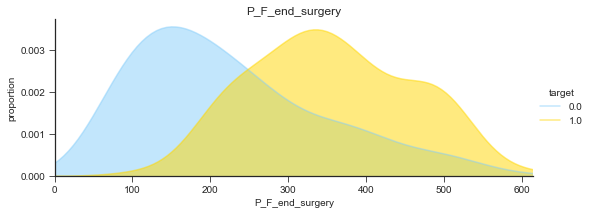

In [54]:
plot_distribution(data,'P_F_end_surgery')

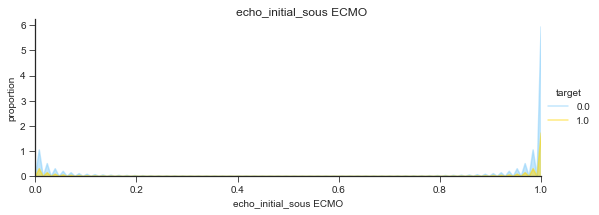

In [113]:
plot_distribution(text_f,'echo_initial_sous ECMO')